# TP6 : Logique Flou

In [67]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

import skfuzzy.control as ctrl

In [68]:
resultats = ctrl.Antecedent(np.arange(0, 21), 'resultats')
methods = ctrl.Antecedent(np.arange(0, 21), 'methods')
presentations = ctrl.Antecedent(np.arange(0, 21), 'presentations')
globals = ctrl.Consequent(np.arange(0, 21), 'globals')

#### Définissez les fonctions d’appartenance de valeurs linguistiques pour chaque variable, ransformez la base de règles en forme normale et Réalisez ce système en Python en utilisant la blibliothèque skfuzzy.

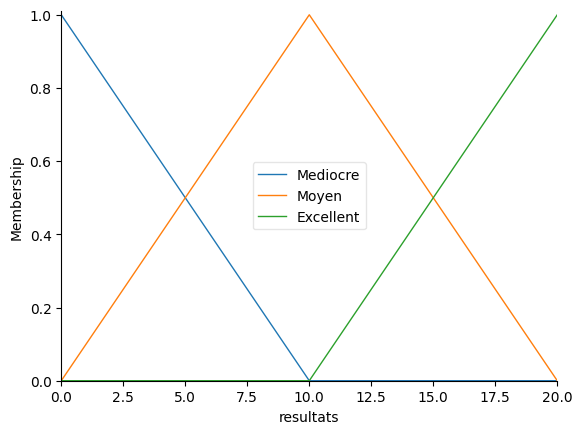

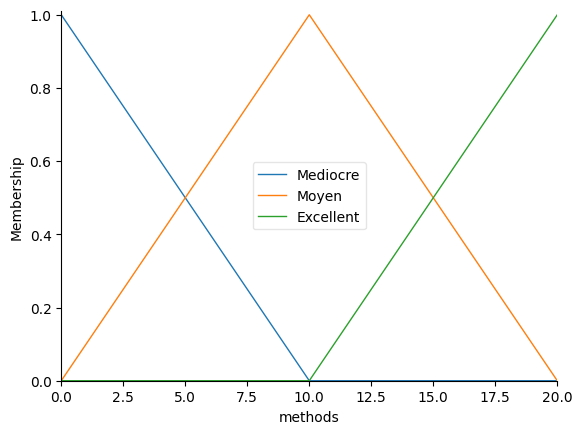

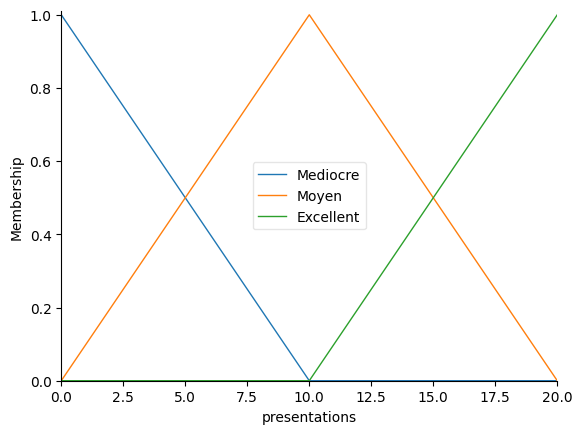

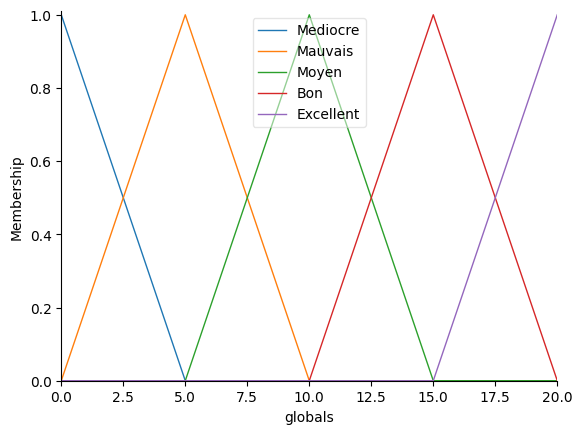

In [69]:
resultats['Mediocre'] = fuzz.trimf(resultats.universe, [0, 0, 10])
resultats['Moyen'] = fuzz.trimf(resultats.universe, [0, 10, 20])
resultats['Excellent'] = fuzz.trimf(resultats.universe, [10, 20, 20])
resultats.view()

methods['Mediocre'] = fuzz.trimf(methods.universe, [0, 0, 10])
methods['Moyen'] = fuzz.trimf(methods.universe, [0, 10, 20])
methods['Excellent'] = fuzz.trimf(methods.universe, [10, 20, 20])
methods.view()

presentations['Mediocre'] = fuzz.trimf(presentations.universe, [0, 0, 10])
presentations['Moyen'] = fuzz.trimf(presentations.universe, [0, 10, 20])
presentations['Excellent'] = fuzz.trimf(presentations.universe, [10, 20, 20])
presentations.view()

globals['Mediocre'] = fuzz.trimf(globals.universe, [0, 0, 5])
globals['Mauvais'] = fuzz.trimf(globals.universe, [0, 5, 10])
globals['Moyen'] = fuzz.trimf(globals.universe, [5, 10, 15])
globals['Bon'] = fuzz.trimf(globals.universe, [10, 15, 20])
globals['Excellent'] = fuzz.trimf(globals.universe, [15, 20, 20])
globals.view()


#### Soit un rapport de stage avec les notes :
- Résultats obtenus : 12
- Méthodes utilisées : 6
- Présentation : 19

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

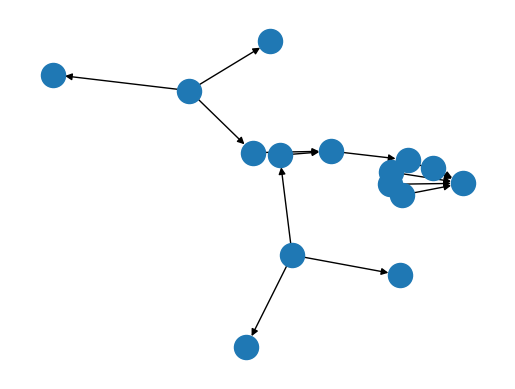

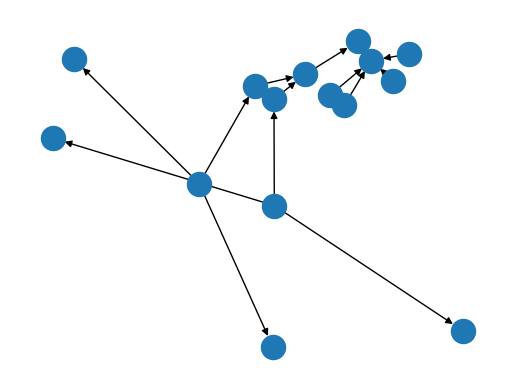

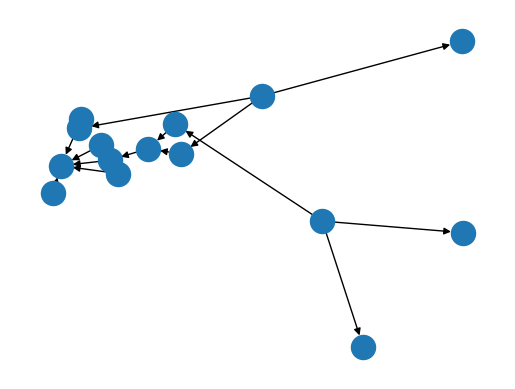

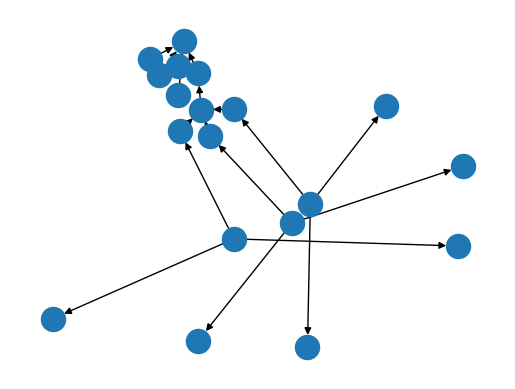

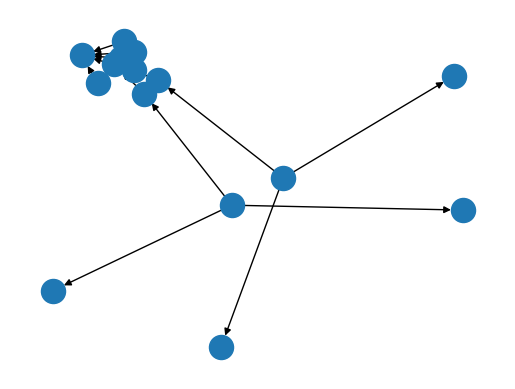

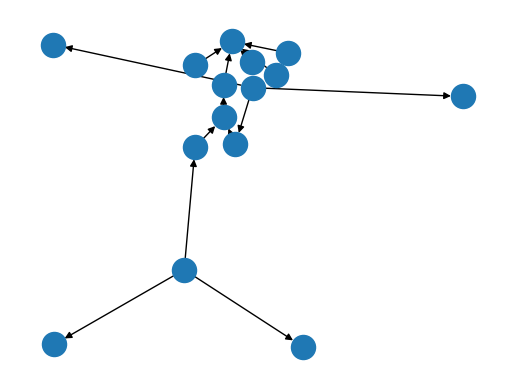

In [70]:
R1 = ctrl.Rule(resultats['Moyen'] & methods['Mediocre'], globals['Mauvais'])
R2 = ctrl.Rule(resultats['Moyen'] & methods['Excellent'], globals['Bon'])
R3 = ctrl.Rule(resultats['Mediocre'] & methods['Moyen'], globals['Mauvais'])
R4 = ctrl.Rule(resultats['Excellent'] & methods['Excellent'] & presentations['Excellent'], globals['Excellent'])
R5 = ctrl.Rule(resultats['Mediocre'] | methods['Moyen'], globals['Moyen'])
R6 = ctrl.Rule(resultats['Moyen'] | methods['Mediocre'], globals['Mediocre'])
R1.view()
R2.view()
R3.view()
R4.view()
R5.view()
R6.view()

#### Que dites-vous de cette base de régles ? Est-elle bien établie ?

In [71]:
globals_ctrl = ctrl.ControlSystem([R1, R2, R3, R4, R5, R6])
globals_ctrl_sim = ctrl.ControlSystemSimulation(globals_ctrl)


In [72]:
globals_ctrl_sim.input['resultats'] = 12.
globals_ctrl_sim.input['methods'] = 6.
globals_ctrl_sim.input['presentations'] = 19.
globals_ctrl_sim.compute()


6.774774774774776


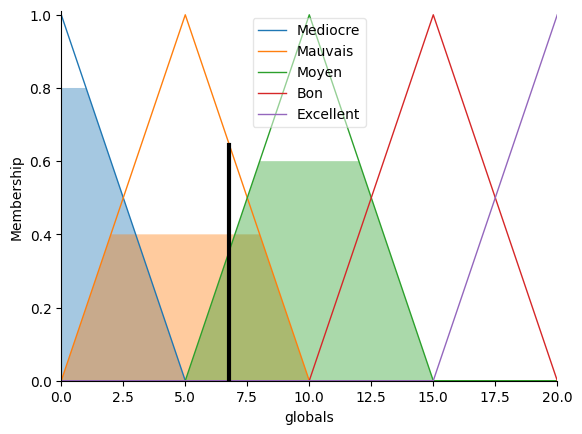

In [73]:
print(globals_ctrl_sim.output['globals'])
globals.view(sim=globals_ctrl_sim)


En observant les résultats, j'en conclue que la base des règles est mal établie car les piques sont trop réguliers.

#### Essayez des définitions alternatives des valeurs linguistique ; changez la méthode de dé-fuzzification. Que’est-ce que vous pouvez constater ?

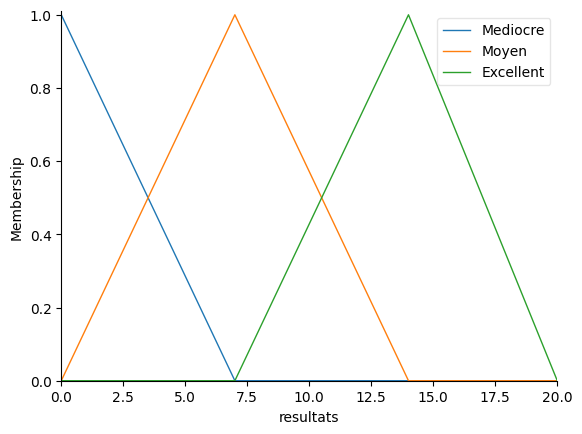

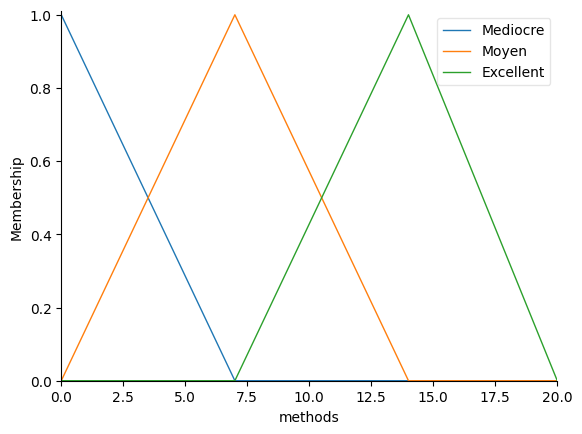

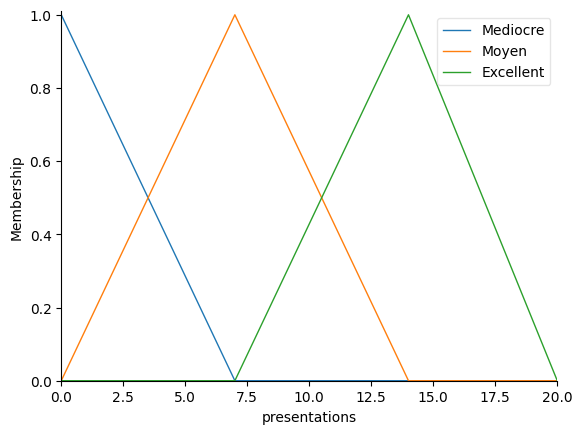

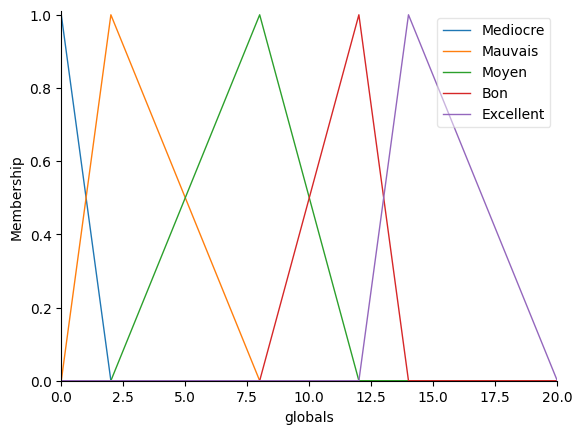

In [74]:
resultats['Mediocre'] = fuzz.trimf(resultats.universe, [0, 0, 7])
resultats['Moyen'] = fuzz.trimf(resultats.universe, [0, 7, 14])
resultats['Excellent'] = fuzz.trimf(resultats.universe, [7, 14, 20])
resultats.view()

methods['Mediocre'] = fuzz.trimf(methods.universe, [0, 0, 7])
methods['Moyen'] = fuzz.trimf(methods.universe, [0, 7, 14])
methods['Excellent'] = fuzz.trimf(methods.universe, [7, 14, 20])
methods.view()

presentations['Mediocre'] = fuzz.trimf(presentations.universe, [0, 0, 7])
presentations['Moyen'] = fuzz.trimf(presentations.universe, [0, 7, 14])
presentations['Excellent'] = fuzz.trimf(presentations.universe, [7, 14, 20])
presentations.view()

globals['Mediocre'] = fuzz.trimf(globals.universe, [0, 0, 2])
globals['Mauvais'] = fuzz.trimf(globals.universe, [0, 2, 8])
globals['Moyen'] = fuzz.trimf(globals.universe, [2, 8, 12])
globals['Bon'] = fuzz.trimf(globals.universe, [8, 12, 14])
globals['Excellent'] = fuzz.trimf(globals.universe, [12, 14, 20])
globals.view()


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

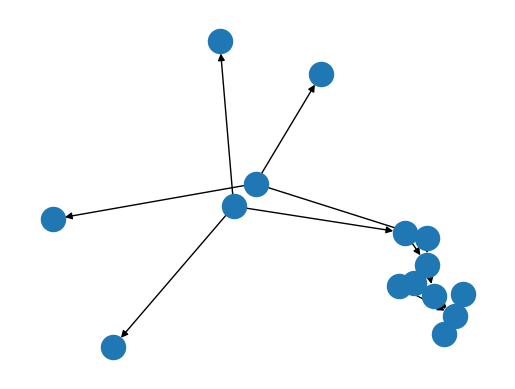

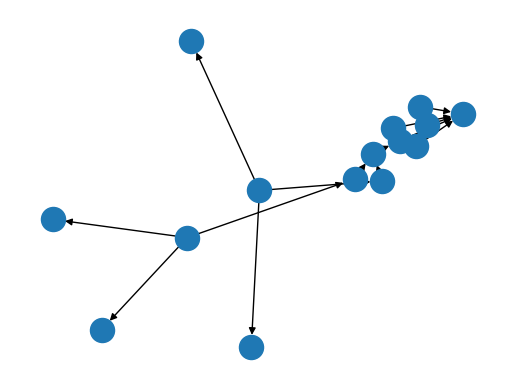

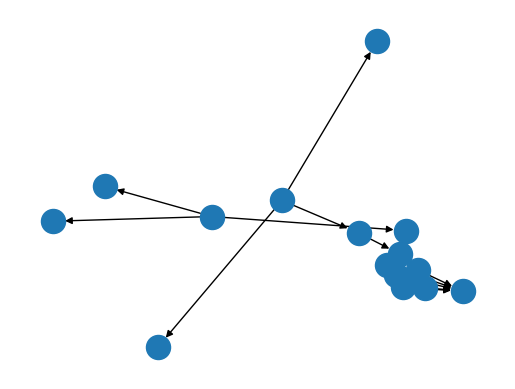

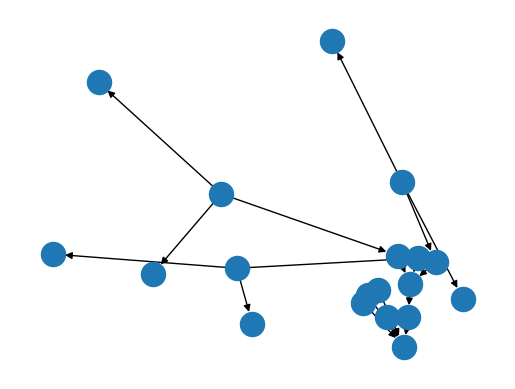

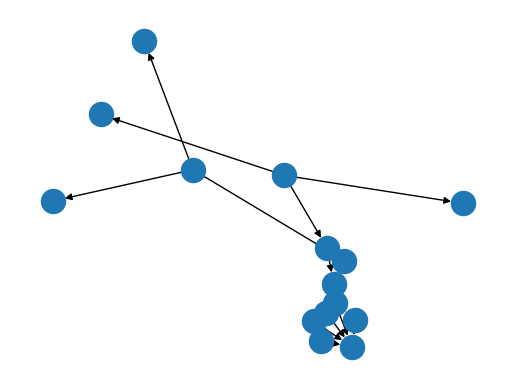

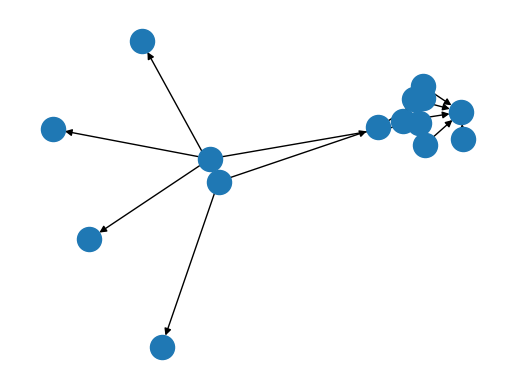

In [75]:
R1 = ctrl.Rule(resultats['Moyen'] & methods['Mediocre'], globals['Mauvais'])
R2 = ctrl.Rule(resultats['Moyen'] & methods['Excellent'], globals['Bon'])
R3 = ctrl.Rule(resultats['Mediocre'] & methods['Moyen'], globals['Mauvais'])
R4 = ctrl.Rule(resultats['Excellent'] & methods['Excellent'] & presentations['Excellent'], globals['Excellent'])
R5 = ctrl.Rule(resultats['Mediocre'] | methods['Moyen'], globals['Moyen'])
R6 = ctrl.Rule(resultats['Moyen'] | methods['Mediocre'], globals['Mediocre'])
R1.view()
R2.view()
R3.view()
R4.view()
R5.view()
R6.view()


6.640780987719763


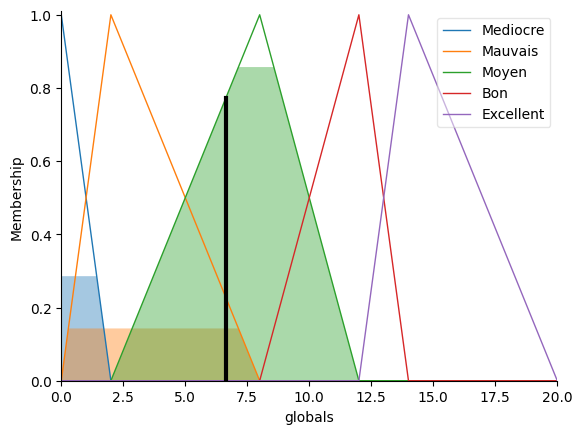

In [76]:
globals_ctrl = ctrl.ControlSystem([R1, R2, R3, R4, R5, R6])
globals_ctrl_sim = ctrl.ControlSystemSimulation(globals_ctrl)
globals_ctrl_sim.input['resultats'] = 12.
globals_ctrl_sim.input['methods'] = 6.
globals_ctrl_sim.input['presentations'] = 19.
globals_ctrl_sim.compute()
print(globals_ctrl_sim.output['globals'])
globals.view(sim=globals_ctrl_sim)


Avec les nouvelles définitions des valeurs linguistique et le changement de la méthode de défuzzication, nous remarquons de résultats différents avec une zone flou plus logique.